<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6683369

### Student Name: Jinming(Patrick) Dong
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [12]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [13]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.anova import anova_lm

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [14]:
# YOUR CODE HERE
bike_shares = pd.read_csv("bike-share.csv")
bike_shares
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     80.53
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          2.43e-110
Time:                        18:41:08   Log-Likelihood:                -6295.3
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     720   BIC:                         1.266e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3033.3075    360.945      8.404      0.0

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


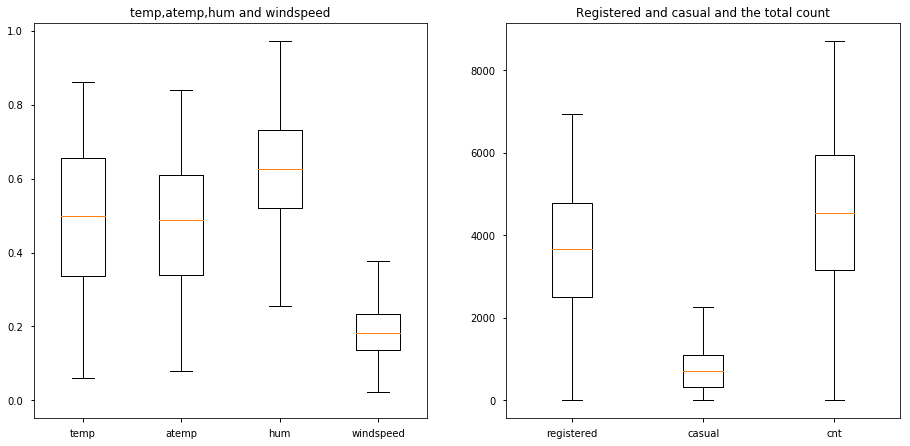

In [15]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24,16))
ax7 = fig.add_subplot(231)
ax8 = fig.add_subplot(232)
x = bike_shares.weekday
y = bike_shares.weathersit
z = bike_shares.temp
n = bike_shares.atemp
m = bike_shares.hum
X = bike_shares[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values
Y = bike_shares['cnt'].values
spe = bike_shares.windspeed
re = bike_shares.registered
ca = bike_shares.casual
co = bike_shares.cnt
data = [re,ca,co]
data1 = [z,n,m,spe]

ax7.boxplot(data1,labels=["temp","atemp","hum","windspeed"])
ax7.set_title('temp,atemp,hum and windspeed')
ax8.boxplot(data,labels=["registered","casual","cnt"])
ax8.set_title('Registered and casual and the total count')

X = sm.add_constant(X) # adding a constant 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model,"\n","\n")

bike_cleans = bike_shares[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]
da = pd.DataFrame(bike_cleans.describe())
print(da,"\n","\n")

bike_cleans.corr()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
In this section, I use OLS regression model, two tables that contains different statiscal insights, and two boxplots to analyse the data.<br>

As temp,atemp,hum,and wind speed are related to each other, hence I plot them in one boxplot graph. And registered, casual,total count in another graph for the same reason.<br>

The reason why I use OLS regression model and two tables is that I want to analyse the data in more depth to show some interesting features that will not only help me in next few sections, but also give a thorough insight and information for the readers.<br>

Also the boxplot show distribution on 5-number summary:minimum, first quartile, median, third quartile, and maximum. Which I think would be best use in this section as I have most those features in my regression model and the table.<br>

</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

Text(0.5,1,'Compare weathersit vs no. of bikes')

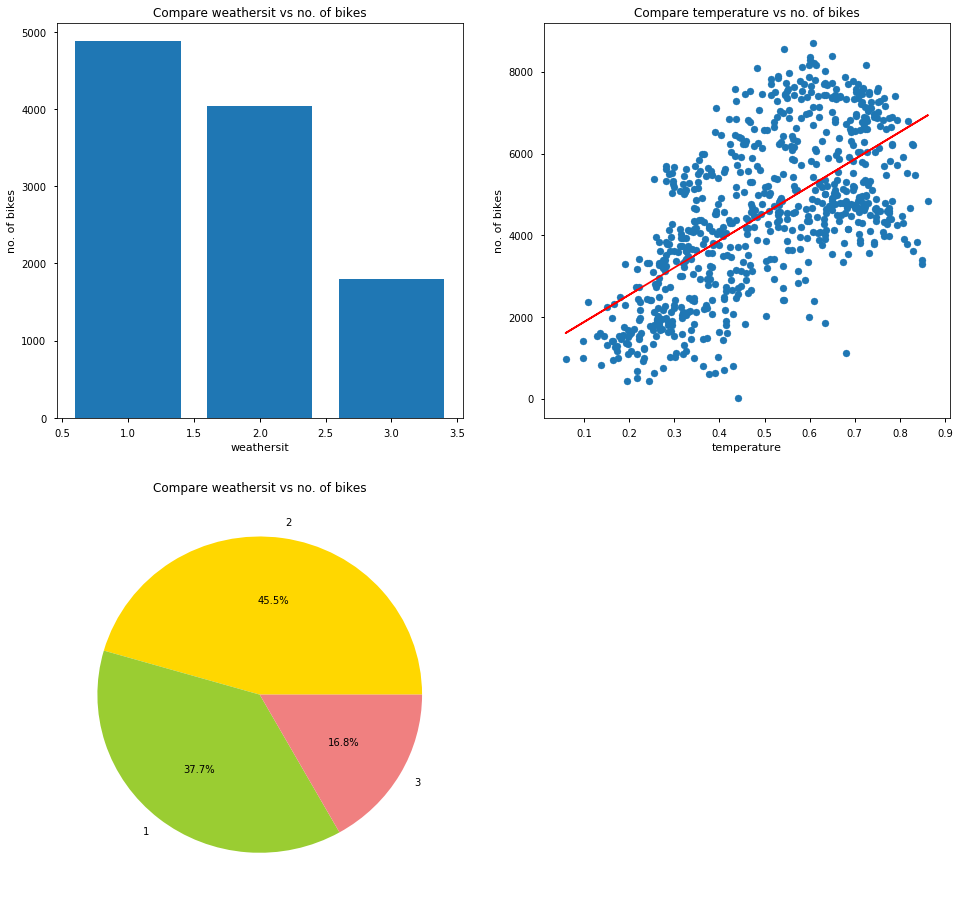

In [16]:
# YOUR CODE HERE
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

list = []
weathers = bike_shares.weathersit.unique()
for e in weathers:
    list.append(bike_shares[(bike_shares['weathersit']==e)].cnt.mean())
y = bike_shares.temp.values.reshape(-1,1)
z = bike_shares.cnt.values.reshape(-1,1)

ax1.set_xlabel('weathersit')
ax1.set_ylabel('no. of bikes')
ax1.set_title('Compare weathersit vs no. of bikes')
ax1.bar(weathers, list)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

a2 = LinearRegression().fit(y,z)
a2pre = a2.predict(y)
ax2.plot(y,a2pre,color = 'red')
ax2.set_xlabel('temperature')
ax2.set_ylabel('no. of bikes')
ax2.set_title('Compare temperature vs no. of bikes')
ax2.scatter(y, z)

sizes = ((bike_shares[bike_shares.weathersit==1]).cnt.mean(),
               (bike_shares[bike_shares.weathersit==2]).cnt.mean(),
               (bike_shares[bike_shares.weathersit==3]).cnt.mean())
colors = ['gold', 'yellowgreen', 'lightcoral']
 
ax3.pie(sizes,labels = weathers,colors = colors,autopct='%1.1f%%')
ax3.set_title('Compare weathersit vs no. of bikes')
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
In this section, I use two graphs to show the relationship between weathersit and no of bikes, temperature and no of bikes respectively. Because weathersit only have 4 values(1,2,3,4,where 4 never occurs), hence I use bar chart to indicate first relationship. The reason why I use mean value for the no of bikes for each weather is that if I use the data straight away without prepocessing it, it will show me the relationship between weathersit and the maxium of no of bikes for each weathersit, which is not generalized enough for our analysing purpose. From the graph, we can see that as weathersit's value is 1, there's more people who rent the bikes, and as the value increase, the no of bikes rented drops dramatically. Hence we can draw the conclusion that people tends to rent bikes when the weather is good, and it seems plausible because whenever there's snow or rain people tends to stay at home or drive car.<br>

As for the relationship between temperature and no of bikes, I use scatter plot and then draw a linear regression line to show the trends for that relationship. From the graph, we can clearly see that as the temperature increases, the no of bikes rented also increase.<br>
</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

Text(0.5,1,'The distribution of bikes on holidays and non-holidays')

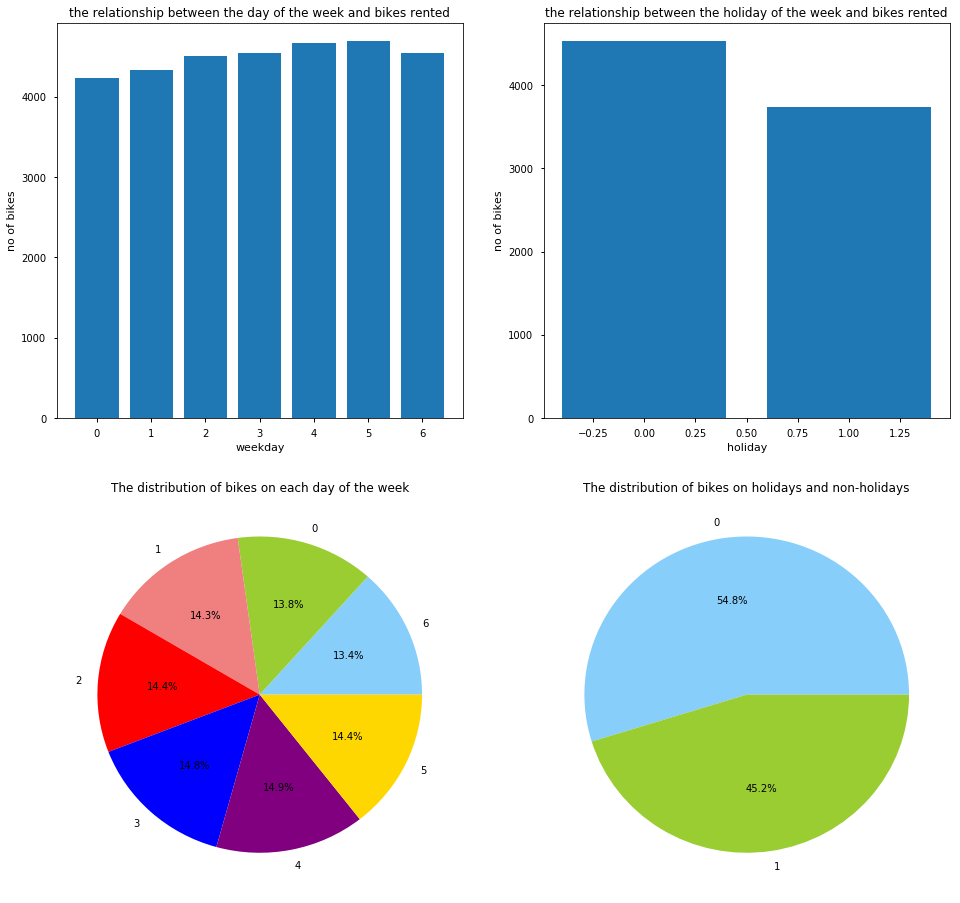

In [17]:
# YOUR CODE HERE
fig = plt.figure(figsize=(16,16))
ax3 = fig.add_subplot(221)
ax5 = fig.add_subplot(222)
ax6 = fig.add_subplot(223)
ax7 = fig.add_subplot(224)

a = bike_shares.weekday
b = bike_shares.holiday
c = bike_shares.cnt
list = []
list1 = []
weekdays = bike_shares.weekday.unique()
holidays = bike_shares.holiday.unique()
for e in weekdays:
    list.append(bike_shares[(bike_shares['weekday']==e)].cnt.mean())
for u in holidays:
    list1.append(bike_shares[(bike_shares['holiday']==u)].cnt.mean())

ax3.set_xlabel('weekday')
ax3.set_ylabel('no of bikes')
ax3.bar(weekdays,list)
ax3.set_title('the relationship between the day of the week and bikes rented')
ax5.set_title('the relationship between the holiday of the week and bikes rented')
ax5.set_xlabel('holiday')
ax5.set_ylabel('no of bikes')
ax5.bar(holidays,list1)

sizes = ((bike_shares[bike_shares.weekday==0]).cnt.mean(),
        (bike_shares[bike_shares.weekday==1]).cnt.mean(),
        (bike_shares[bike_shares.weekday==2]).cnt.mean(),
        (bike_shares[bike_shares.weekday==3]).cnt.mean(),
        (bike_shares[bike_shares.weekday==4]).cnt.mean(),
        (bike_shares[bike_shares.weekday==5]).cnt.mean(),
        (bike_shares[bike_shares.weekday==6]).cnt.mean())
colors = ['lightskyblue', 'yellowgreen', 'lightcoral','red','blue','purple','gold'] 
ax6.pie(sizes,labels = weekdays,colors = colors,autopct='%1.1f%%')
ax6.set_title('The distribution of bikes on each day of the week')
size1 = ((bike_shares[bike_shares.holiday==0]).cnt.mean(),
        (bike_shares[bike_shares.holiday==1]).cnt.mean())
color = ['lightskyblue','yellowgreen']
ax7.pie(size1,labels = holidays,colors = color,autopct='%1.1f%%')
ax7.set_title('The distribution of bikes on holidays and non-holidays')
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
For this section, I compare the day of the week and holiday of the week with the number of bikes rented respectively. I use bar chart for both of them because weekday has values of 0-6 and holiday has values of 0-1(0 means not holiday while 1 means holiday). By using bar chart and pie chart, I am able to show the comparison between each day of the week's bike rented count, as well as the comparison between holiday and not holiday's bike rented count.<br>

From the graphs, we can clearly see that there's more people rented bikes at Friday and weekends. And in holiday there are less people who rented bikes which is also plausible.

</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

Text(0.5,1,'the relationship between registered and casual user in holidays and workdays')

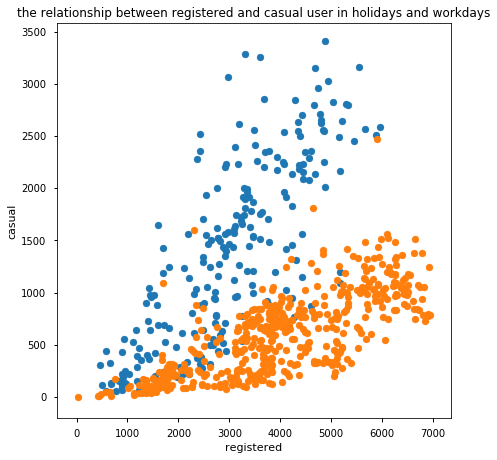

In [19]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24,16))
ax5 = fig.add_subplot(231)
holiday = bike_shares[(bike_shares['workingday']==0)]
list = []
weathers = bike_shares.weathersit.unique()
for e in weathers:
    list.append(bike_shares[(bike_shares['weathersit']==e)].cnt.mean())
workingday = bike_shares[(bike_shares['workingday']==1)]
d = holiday.registered.values.reshape(-1,1)
e = holiday.casual.values.reshape(-1,1)
f = workingday.registered.values.reshape(-1,1)
g = workingday.casual.values.reshape(-1,1)

ax5.set_xlabel('registered')
ax5.set_ylabel('casual')
ax5.scatter(d,e)
ax5.scatter(f,g)
ax5.set_title('the relationship between registered and casual user in holidays and workdays')
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
For this section, I use scatter plot to show the relationship between registered and casual user in holidays and workdays, where the blue scatter plot denotes holiday while red scatter plot denotes workday. I also use 2 linear regression lines to show the trends between registered user and casual user clearly.<br>

From the graph, we can see that there are more people rent bikes on workdays compare with holidays(which justifies the previous question), and while the registred user increases, the casual user also increases.

</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

Text(0.5,1,'relationship between weather and the windspeed')

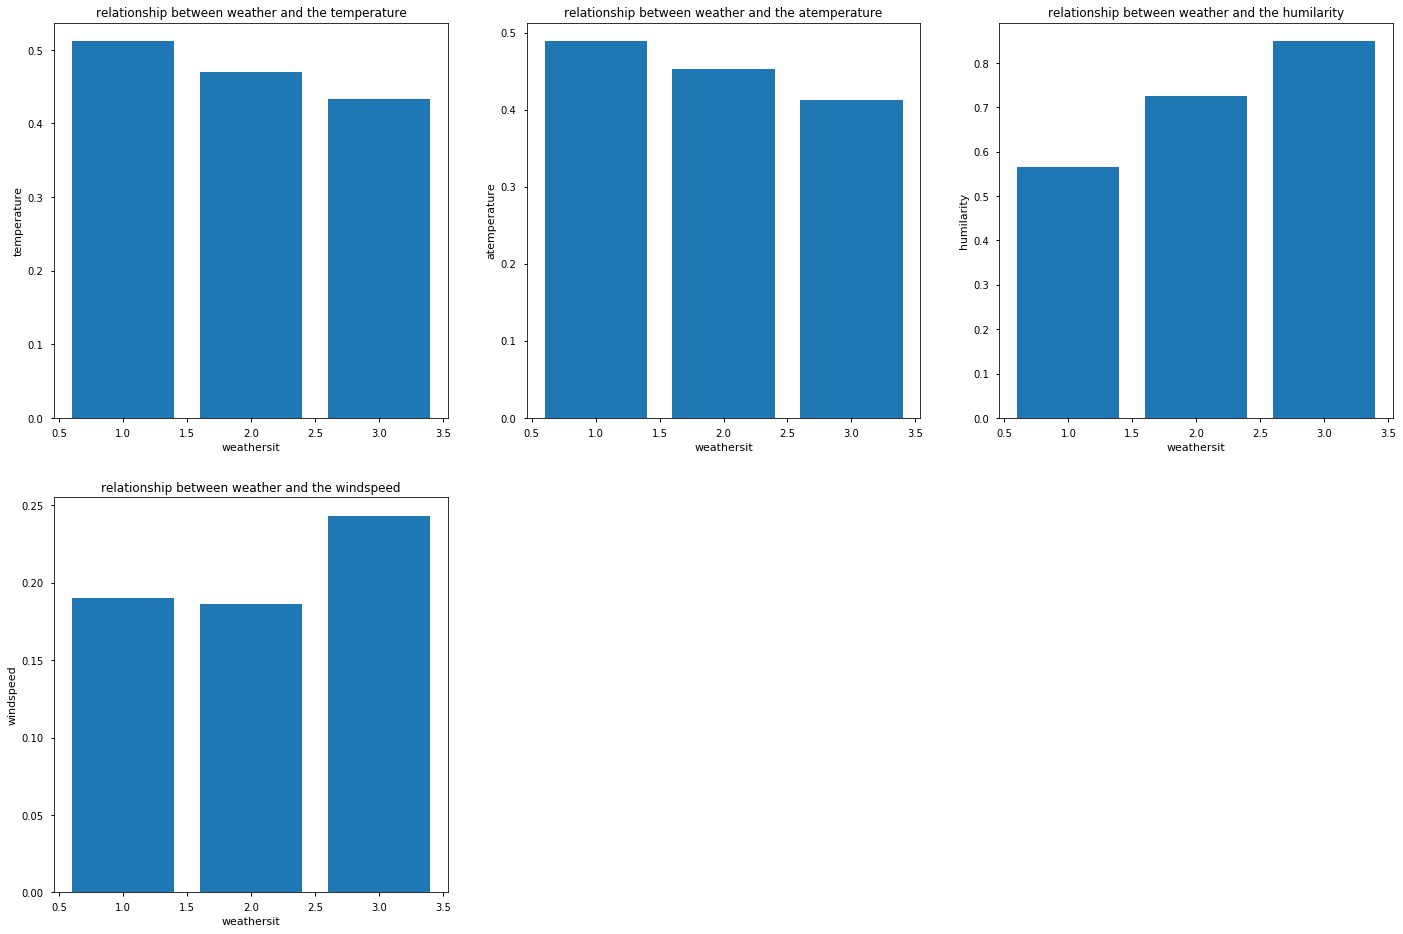

In [9]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24,16))
ax10 = fig.add_subplot(231)
ax11 = fig.add_subplot(232)
ax12 = fig.add_subplot(233)
ax13 = fig.add_subplot(234)
list = []
weathers = bike_shares.weathersit.unique()
for e in weathers:
    list.append(bike_shares[(bike_shares['weathersit']==e)].temp.mean())
ax10.bar(weathers,list)
ax10.set_xlabel('weathersit')
ax10.set_ylabel('temperature')
ax10.set_title('relationship between weather and the temperature')
list1 = []
for e in weathers:
    list1.append(bike_shares[(bike_shares['weathersit']==e)].atemp.mean())
ax11.bar(weathers,list1)
ax11.set_xlabel('weathersit')
ax11.set_ylabel('atemperature')
ax11.set_title('relationship between weather and the atemperature')
list2 = []
for e in weathers:
    list2.append(bike_shares[(bike_shares['weathersit']==e)].hum.mean())
ax12.bar(weathers,list2)
ax12.set_xlabel('weathersit')
ax12.set_ylabel('humilarity')
ax12.set_title('relationship between weather and the humilarity')
list3 = []
for e in weathers:
    list3.append(bike_shares[(bike_shares['weathersit']==e)].windspeed.mean())
ax13.bar(weathers,list3)
ax13.set_xlabel('weathersit')
ax13.set_ylabel('windspeed')
ax13.set_title('relationship between weather and the windspeed')
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
For this section, I have compared all weather relevant data with the weathersit. In order to visualize it, I have drawed 4 bar chart, as weathersit only have 4 values(1,2,3,4).<br>

From the graph, we can see that if the temperature is high, it's morelikely that this day has a good weather. On the other hand, if the wind speed and humilarity is high, it's morelikely that this day has a bad weather.

</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

Text(0.5,1,'the relationship between windspeed and no of bikes rented')

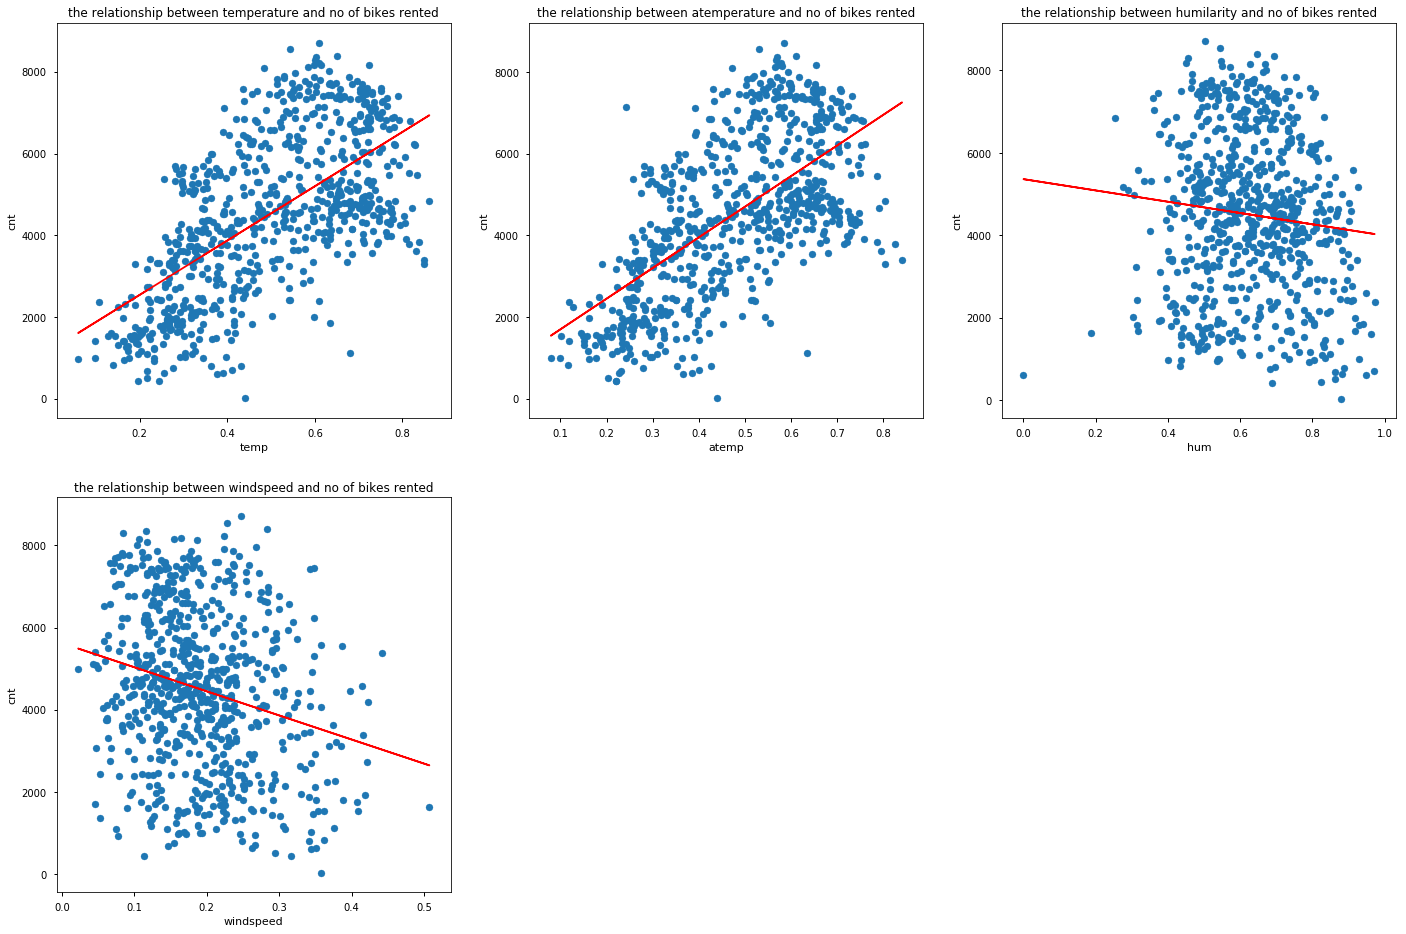

In [10]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24,16))
ax6 = fig.add_subplot(231)
ax7 = fig.add_subplot(232)
ax8 = fig.add_subplot(233)
ax9 = fig.add_subplot(234)
temp = bike_shares.temp.values.reshape(-1,1)
atemp = bike_shares.atemp.values.reshape(-1,1)
hum = bike_shares.hum.values.reshape(-1,1)
windspeed = bike_shares.windspeed.values.reshape(-1,1)
cnt = bike_shares.cnt.values.reshape(-1,1)
a6 = LinearRegression().fit(temp,cnt)
a6pre = a6.predict(temp)
ax6.plot(temp,a6pre,color = 'red')
ax6.scatter(temp,cnt)
ax6.set_xlabel('temp')
ax6.set_ylabel('cnt')
ax6.set_title('the relationship between temperature and no of bikes rented')
a7 = LinearRegression().fit(atemp,cnt)
a7pre = a7.predict(atemp)
ax7.plot(atemp,a7pre,color = 'red')
ax7.scatter(atemp,cnt)
ax7.set_xlabel('atemp')
ax7.set_ylabel('cnt')
ax7.set_title('the relationship between atemperature and no of bikes rented')
a8 = LinearRegression().fit(hum,cnt)
a8pre = a8.predict(hum)
ax8.plot(hum,a8pre,color = 'red')
ax8.scatter(hum,cnt)
ax8.set_xlabel('hum')
ax8.set_ylabel('cnt')
ax8.set_title('the relationship between humilarity and no of bikes rented')
a9 = LinearRegression().fit(windspeed,cnt)
a9pre = a9.predict(windspeed)
ax9.plot(windspeed,a9pre,color = 'red')
ax9.scatter(windspeed,cnt)
ax9.set_xlabel('windspeed')
ax9.set_ylabel('cnt')
ax9.set_title('the relationship between windspeed and no of bikes rented')
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
Interestingly, the environment actually does impact on the no of bikes rented. I draw 4 graphs which are environment factors' relationship with the no of bikes. I use scatter plot and linear regression to show the trends.<br>

From the graphs, we can see that as the temperature,atemperature increases, the no of bikes rented increases. And as the humilarity,windspeed increases, the no of bikes rented decreases. It also seems plausible because people tends to stay at home or choose other vehicles when the weather is rainy,snowy or windy.

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [11]:
# YOUR CODE HERE
X = bike_shares[['season','weathersit','temp','atemp','hum','windspeed']].values
y = bike_shares['cnt'].values
reg = LinearRegression().fit(X, y)
predict_arr = np.array([3, 2, 0.4, 0.28, 0.6, 0.3])
predict_arr = predict_arr.reshape(1,-1)
pre = reg.predict(predict_arr)
# Make predictions using the testing set
bike_y_pred = reg.predict(X)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, bike_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, bike_y_pred))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Coefficients: 
 [  406.37255198  -449.17048825  2539.16278765  3558.62581302
 -2419.83853581 -3187.62926052]
Mean squared error: 1800794.42
Variance score: 0.52
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     130.5
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          1.07e-111
Time:                        18:40:40   Log-Likelihood:                -6301.8
No. Observations:                 731   AIC:                         1.262e+04
Df Residuals:                     724   BIC:                         1.265e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

<span style="color:blue">
    
### YOUR ANSWER HERE
For this section, I have build a linear regression model which can give me a best line fit for the relationship. In this way, I can predict count of bicycles given all the conditions I need. I use OLS regression table and sklearn pack to give me with the results.<br>

From the result, we can see that season,temperature,atemperature are positive factors to no of bicycles rented while weathersit,hum,windspeed are negative factors to no of bicycles rented.

</span>